In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
data=pd.read_csv("data/datafest2018.csv")

In [4]:
data.head()

,date,companyId,jobId,country,stateProvince,city,avgOverallRating,numReviews,industry,normTitle,...,experienceRequired,estimatedSalary,salaryCurrency,jobLanguage,supervisingJob,licenseRequiredJob,educationRequirement,jobAgeDays,clicks,localClicks
0,2016-10-01,company00000,job0000000,US,TX,Dallas-Fort Worth,0.0,NaN,NaN,home health aide,...,NaN,69300,NaN,EN,0.0,1.0,None,97,18,2
1,2016-10-01,company00001,job0000001,US,MA,Boston,4.0,551.0,HEALTH_CARE,senior food service worker,...,0.0,22700,NaN,EN,0.0,0.0,High school,94,14,3
2,2016-10-01,company00002,job0000002,US,FL,Melbourne,0.0,NaN,NaN,field service engineer,...,5.0,66000,NaN,EN,0.0,0.0,Higher education,92,7,0
3,2016-10-01,company00003,job0000003,US,MA,Plymouth,3.8,73.0,NaN,cashier,...,1.0,14900,NaN,EN,0.0,0.0,High school,84,23,23
4,2016-10-01,company00004,job0000004,CA,QC,Montréal,3.5,112.0,NaN,reservation agent,...,NaN,33500,NaN,EN,0.0,0.0,None,81,8,2


In [7]:
data.columns

Index(['date', 'companyId', 'jobId', 'country', 'stateProvince', 'city',
       'avgOverallRating', 'numReviews', 'industry', 'normTitle',
       'normTitleCategory', 'descriptionCharacterLength',
       'descriptionWordCount', 'experienceRequired', 'estimatedSalary',
       'salaryCurrency', 'jobLanguage', 'supervisingJob', 'licenseRequiredJob',
       'educationRequirement', 'jobAgeDays', 'clicks', 'localClicks'],
      dtype='object')

In [9]:
data.dtypes

date                           object
companyId                      object
jobId                          object
country                        object
stateProvince                  object
city                           object
avgOverallRating              float64
numReviews                    float64
industry                       object
normTitle                      object
normTitleCategory              object
descriptionCharacterLength      int64
descriptionWordCount            int64
experienceRequired            float64
estimatedSalary                 int64
salaryCurrency                 object
jobLanguage                    object
supervisingJob                float64
licenseRequiredJob            float64
educationRequirement           object
jobAgeDays                      int64
clicks                          int64
localClicks                     int64
dtype: object

In [3]:
jobs=data.groupby("jobId")

In [30]:
company=data.groupby("companyId")

In [32]:
company.jobId.nunique().sort_values(ascending=False)

companyId
company00090     29929
company04919      3605
company00211      2960
company00047      2746
company00025      2697
company00723      2630
company00096      2525
company00339      2451
company00274      2425
company00146      2060
company01877      2033
company02251      1961
company00206      1949
company00003      1896
company07458      1891
company03626      1874
company00455      1859
company00162      1847
company01377      1818
company00528      1799
company02721      1734
company00348      1679
company00087      1505
company04701      1440
company00118      1394
company06596      1393
company00061      1381
company02191      1358
company13184      1338
company00534      1330
                 ...  
company223607        1
company223605        1
company223604        1
company223603        1
company223625        1
company223628        1
company223657        1
company223630        1
company223656        1
company223655        1
company223654        1
company223653        1
c

In [7]:
data.jobId.nunique()

1082908

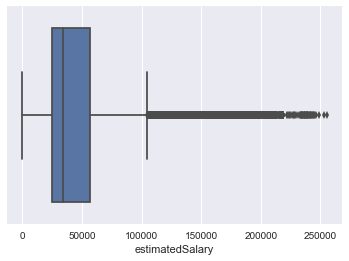

In [11]:
sns.boxplot(jobs["estimatedSalary"].mean())

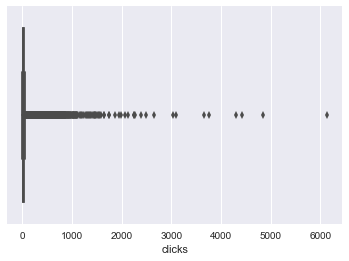

In [12]:
sns.boxplot(jobs["clicks"].mean())

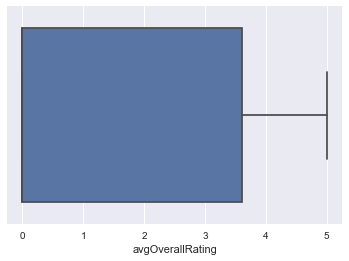

In [13]:
sns.boxplot(jobs["avgOverallRating"].mean())

C:\Users\slee7268\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


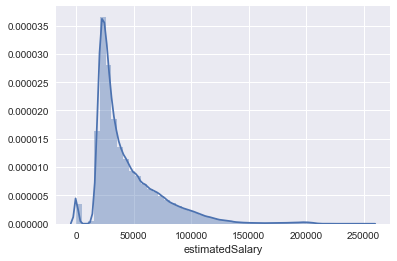

In [14]:
sns.distplot(jobs["estimatedSalary"].mean())

Company00090 is the outlier with 321687 jobs posted by it (not necessarily unique ones). We hypothesize that it's the aggregate of people just posting on indeed rather than the crawlers cause we saw jobs like housekeeping.

Text(0.5,1,'Number of Jobs by State')

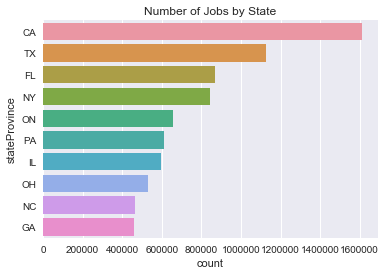

In [9]:
sns.countplot(y=jobs["stateProvince"].nunique(), data=jobs, order = jobs.stateProvince.nunique().value_counts().iloc[:10].index).set_title("Number of Jobs by State")

Text(0.5,1,'Number of Jobs by City')

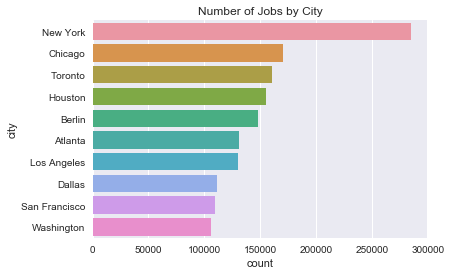

In [14]:
sns.countplot(y=data["city"], data=data, order = data.city.value_counts().iloc[:10].index).set_title("Number of Jobs by City")

Text(0.5,1,'Number of Jobs by Industry')

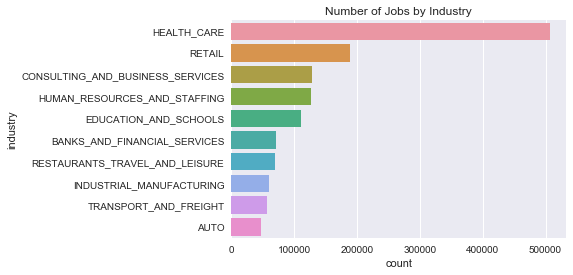

In [11]:
sns.countplot(y=data["industry"], data=data, order = data.industry.value_counts().iloc[:10].index).set_title("Number of Jobs by Industry")

Text(0.5,1,'Number of Jobs by Category')

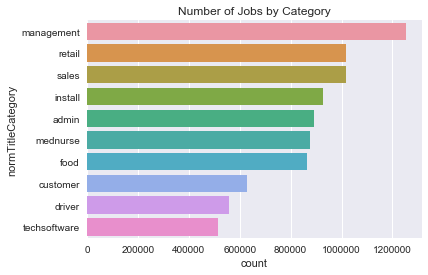

In [13]:
sns.countplot(y=data["normTitleCategory"], data=data, order = data.normTitleCategory.value_counts().iloc[:10].index).set_title("Number of Jobs by Category")

In [49]:
data.jobLanguage.value_counts()

EN    15473147
DE     1947915
FR      214234
Name: jobLanguage, dtype: int64

In [52]:
data.city.nunique()

22216

In [25]:
#healthcare jobs
health=data[data["industry"]=="HEALTH_CARE"]

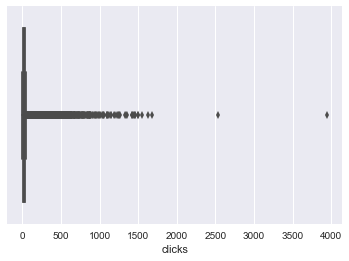

In [39]:
sns.boxplot(health.clicks)

Text(0.5,1,'Number of Healthcare Jobs by Company')

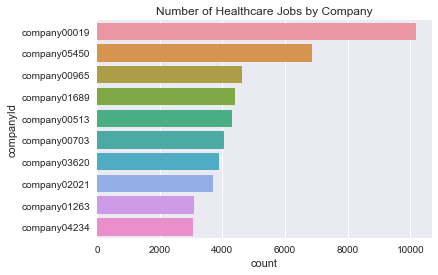

In [27]:
sns.countplot(y=health["companyId"], data=health, order = health.companyId.value_counts().iloc[:10].index).set_title("Number of Healthcare Jobs by Company")

Text(0.5,1,'Number of Healthcare Jobs by State')

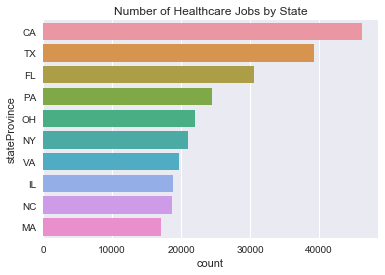

In [28]:
sns.countplot(y=health["stateProvince"], data=health, order = health.stateProvince.value_counts().iloc[:10].index).set_title("Number of Healthcare Jobs by State")

Text(0.5,1,'Number of Healthcare Jobs by City')

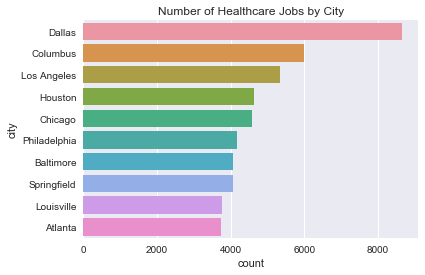

In [29]:
sns.countplot(y=health["city"], data=health, order = health.city.value_counts().iloc[:10].index).set_title("Number of Healthcare Jobs by City")

Text(0.5,1,'Number of Healthcare Jobs by Category')

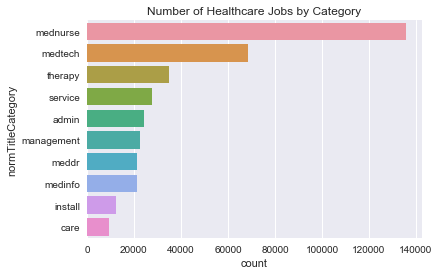

In [30]:
sns.countplot(y=health["normTitleCategory"], data=health, order = health.normTitleCategory.value_counts().iloc[:10].index).set_title("Number of Healthcare Jobs by Category")

Dealing with NAs

In [35]:
data.isnull().sum()

date                                 0
companyId                            0
jobId                                0
country                              0
stateProvince                        0
city                            348239
avgOverallRating                   301
numReviews                     9374619
industry                      15817476
normTitle                      1593057
normTitleCategory              1593057
descriptionCharacterLength           0
descriptionWordCount                 0
experienceRequired            11002733
estimatedSalary                      0
salaryCurrency                14641267
jobLanguage                          0
supervisingJob                 2164079
licenseRequiredJob             2164079
educationRequirement           2164079
jobAgeDays                           0
clicks                               0
localClicks                          0
dtype: int64

In [42]:
total=np.product(data.shape)
total_missing=(data.isnull().sum()).sum()
(total_missing/total)*100

15.005230321105445

In [6]:
data["Ratio_Local_Clicks_To_Clicks"] = data["localClicks"]/data["clicks"]

In [7]:
data["country"].unique()

array(['US', 'CA', 'DE'], dtype=object)

In [ ]:
d= data.corr()

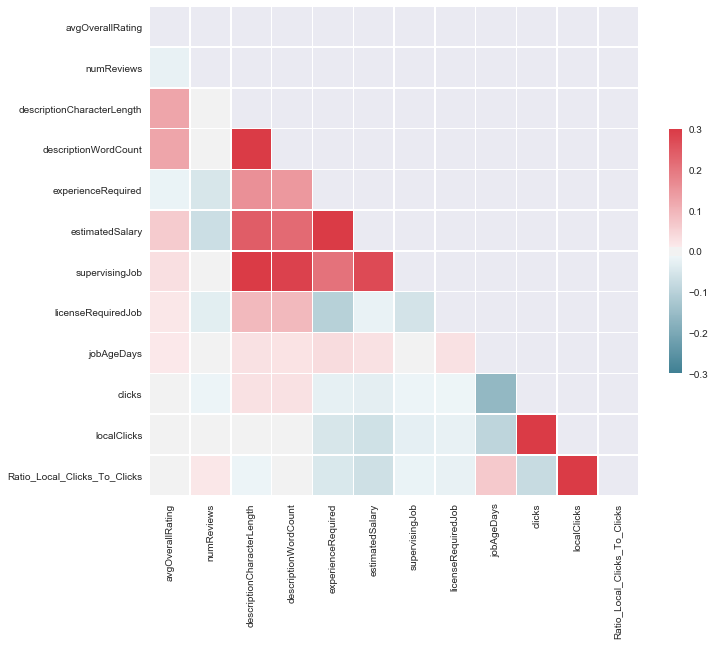

In [14]:
f, ax = plt.subplots(figsize=(11, 9))
mask = np.zeros_like(d, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(d, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})